<a href="https://colab.research.google.com/github/wj9304081/Prediction-of-quality-of-Wine/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C%EF%BC%8302%EF%BC%9A%E7%B4%85%E9%85%92%E5%93%81%E8%B3%AA%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [113]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


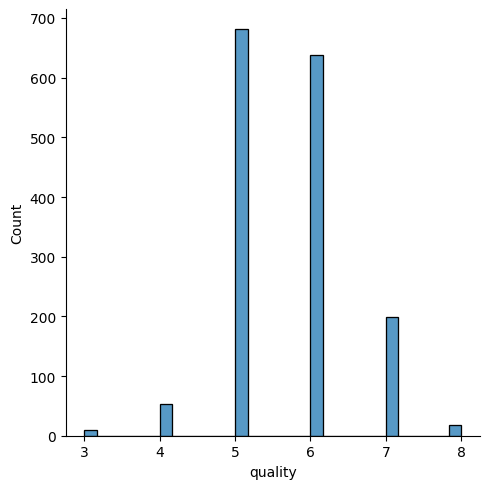

In [102]:
sns.displot(data = df, x ='quality')

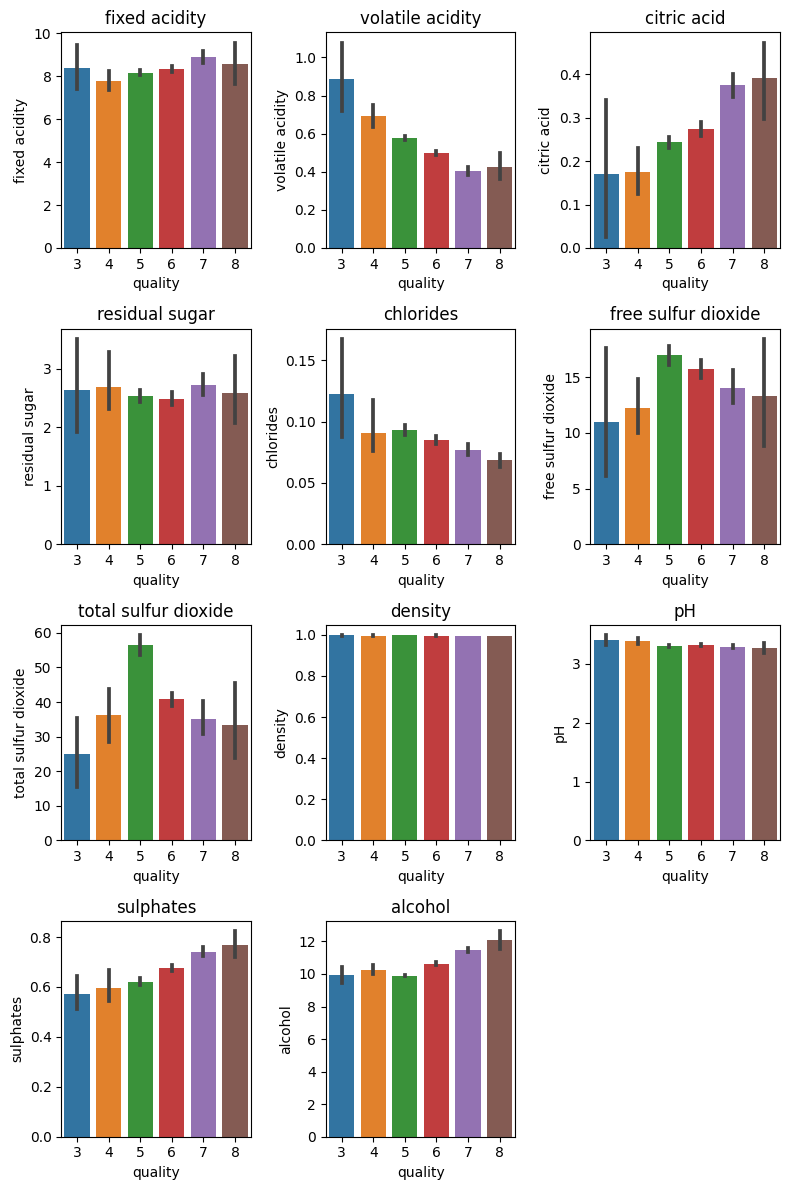

In [103]:
fig, axs = plt.subplots(4, 3,figsize =(8,12))

column_index = 0

for i in range(4):
  for j in range(3):
      if df.columns[column_index] == 'quality':
        continue
      sns.barplot(data = df, x ='quality', y = df.columns[column_index],ax=axs[i,j])
      axs[i,j].set_title(df.columns[column_index])
      column_index = column_index + 1


axs[3,2].remove()
plt.tight_layout()
plt.show()

In [104]:
#'fixed acidity','residual sugar','density' do not appear have any variance and trend. Might drop them for the model.
#'volatile acidity','chlorides','pH' have negative effect on quality.
#'citric acid','sulphates', 'alcohol' have positive effect on quality.
#'free sulfur dioxide', 'total sulfur dioxide' have weird relationship. Having two these elements will produce normal quality of wine.

<Axes: >

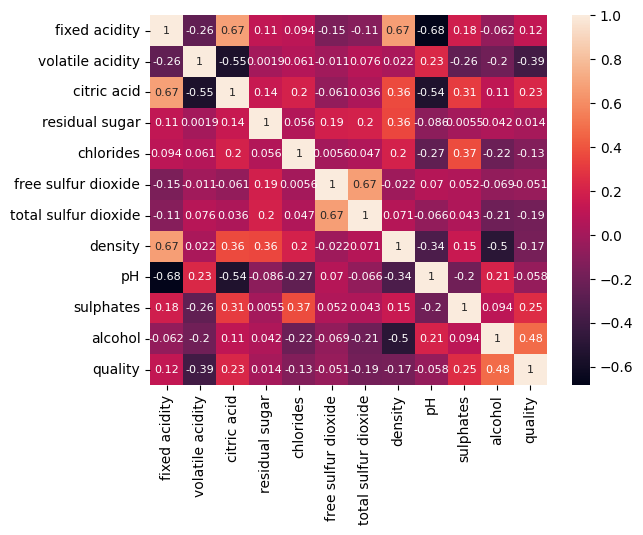

In [105]:
sns.heatmap(df.corr(),annot = True,annot_kws={"size": 8})

Data Preparation

In [106]:
#No missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [107]:
#Feature Engineering - Creating new variables
bins = (0,6.5,10)
group_names = ['bad','good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [108]:
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(df['quality'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [109]:
#Standardize
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature_columns = df.columns.difference(["quality"])
df[feature_columns] = scaler.fit_transform(df[feature_columns])

In [110]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df_train = df.drop(columns = ['fixed acidity','residual sugar','density'])

X = df_train.drop('quality', axis = 1)
y = df_train['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)

print(rfc_eval)
print(rfc_eval.mean())

[0.87109375 0.92578125 0.87109375 0.9375     0.91764706]
0.9046231617647059
